In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from IPython.display import clear_output

In [52]:
board = np.full((3, 3), 0 ,dtype=int)
player = 1

def make_move(board, move):
  
    global player
    x, y = move[0], move[1]
    
    # Kontrollera om rutan är ledig
    if board[y][x] == 0:
        board[y][x] = player
        return True
    else:
        # Om rutan är upptagen, varna användaren
        print(f"\nFEL: Rutan ({x}, {y}) är redan upptagen! Försök igen.")
        return False

def check_line(line, player):
    # Returns True if all elements in the line match the player aka X or O
    return np.all(line == player)

def check_draw(board):
    if np.all(board != 0):
        return True
    return False
def check_win(board):
    global player
    #Check rows
    for row in range(3):
        if check_line(board[row, :], player):
            return True
    #Check Columns
    for col in range(3):
        if check_line(board[:, col], player):
            return True
    #Check diagonal
    if check_line(np.diag(board), player):
        return True
    #Check other diagonal
    if check_line(np.diag(np.fliplr(board)), player):
        return True
    #No win
    return False

def clear_board():
    global player
    global board
    board = np.full((3, 3), 0 ,dtype=int)
    player = 1

def available_moves(board):
    return [tuple(m) for m in np.argwhere(board == 0)]


def draw_board(board, opponent:str):
    clear_output(wait=True)
    plt.figure(figsize=(5, 5))
    plt.xlim(0, 3)
    plt.ylim(0, 3)

    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    
    # Vertical
    plt.plot([1,1], [0,3], color='black', linewidth=2)
    plt.plot([2,2], [0,3], color='black', linewidth=2)
    # Horizontal
    plt.plot([0,3], [1,1], color='black', linewidth=2)
    plt.plot([0,3], [2,2], color='black', linewidth=2)

    #Place things
    for row in range(3):
        for col in range(3):
            symbol = board[row, col]

            if symbol != 0:
                x_pos = col + 0.5
                y_pos = 2.5 - row
                #Color
                color = 'red' if symbol == 1 else 'blue'
                #draw
                plt.text(x_pos, y_pos,'X' if symbol == 1 else 'O', fontsize=40, ha='center', va='center', color=color)
    plt.title("Tic Tac Toe vs " + opponent)
    plt.show()


# make_move(board, (0,0))
# make_move(board, (0,1))
# make_move(board, (0,2))
# print(check_win(board))
# print(check_draw(board))
# #clear_board()
# draw_board(board, "MEEEEEEEEEEE")
# # while True:
# #     input()

In [53]:
#Load perfect strategy
perfect_strategy = strategy = pickle.load(open("perfectPolicy.p", "rb"))
print(len(strategy))
perfect_strategy

4520


{(0, 0, 0, 0, 0, 0, 0, 0, 0): array([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 (1, 0, 0, 0, 0, 0, 0, 0, 0): array([0., 0., 0., 1., 0., 0., 0., 0.]),
 (1, 2, 0, 0, 0, 0, 0, 0, 0): array([0., 0., 1., 0., 0., 0., 0.]),
 (1, 2, 1, 0, 0, 0, 0, 0, 0): array([0., 1., 0., 0., 0., 0.]),
 (1, 2, 1, 2, 0, 0, 0, 0, 0): array([1., 0., 0., 0., 0.]),
 (1, 2, 1, 2, 1, 0, 0, 0, 0): array([1., 0., 0., 0.]),
 (1, 2, 1, 2, 1, 2, 0, 0, 0): array([1., 0., 0.]),
 (1, 2, 1, 2, 1, 2, 0, 1, 0): array([1., 0.]),
 (1, 2, 1, 2, 1, 2, 2, 1, 0): array([1.]),
 (1, 2, 1, 2, 1, 2, 0, 1, 2): array([1.]),
 (1, 2, 1, 2, 1, 0, 2, 0, 0): array([0., 0., 1.]),
 (1, 2, 1, 2, 1, 1, 2, 0, 0): array([0., 1.]),
 (1, 2, 1, 2, 1, 1, 2, 2, 0): array([1.]),
 (1, 2, 1, 2, 1, 1, 2, 0, 2): array([1.]),
 (1, 2, 1, 2, 1, 0, 2, 1, 0): array([0., 1.]),
 (1, 2, 1, 2, 1, 0, 2, 1, 2): array([1.]),
 (1, 2, 1, 2, 1, 0, 0, 2, 0): array([1., 0., 0.]),
 (1, 2, 1, 2, 1, 1, 0, 2, 0): array([1., 0.]),
 (1, 2, 1, 2, 1, 1, 0, 2, 2): array([1.]),
 (1, 2, 1, 

In [54]:
class QAgent:
    def __init__(self, symbol, epsilon=0.1, gamma=0.95, alpha=0.1, policy={}):
        self.symbol = symbol
        self.q_table = policy
        self.epsilon = epsilon # Chansen att agenten gör ett slumpmässigt drag 
        self.gamma = gamma # Hur mycket framtida belöningar värderas jämfört med omedelbara.
        self.alpha = alpha # Inlärningshastighet
        self.last_state = None
        self.last_action = None

    def generate_state_string(self, board):
        return str(board.reshape(9)) # gör om numpy array till en string för användan i dict
    
    def choose_move(self, board):
        state = self.generate_state_string(board)
        moves = available_moves(board)

        #epsilon random exploration thing
        if random.random() < self.epsilon:
            return random.choice(moves)
        
        # utvärdera vilket drag man ska gör utifrån q tabellen


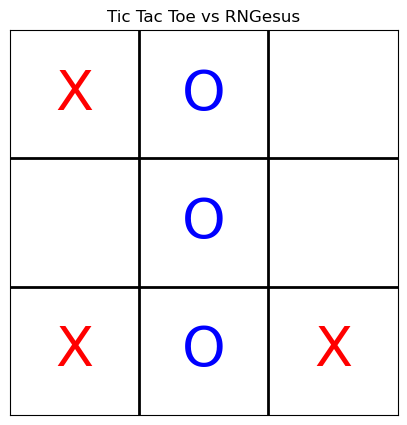

O vann!


In [55]:
def input_processor(move_str):
    if move_str.lower() == 'q':
        return 'quit'

    parts = move_str.split()
    if len(parts) != 2:
        raise ValueError("Ange två siffror separerade med ett mellanslag")


    x = int(parts[0])
    y = int(parts[1])
    return (x,y)


opponent = "Human"
choice = input("1 = Human. 2 = Random. 3 = Perfect Policy. 4 = Home Grown Policy 5 = Dont play")
run_game = True
if choice == "5":
    run_game = False
while run_game:
    
    #First Player
    
    player = 1
    if choice == "1":
        opponent = "Human"
        move_made = False
        while not move_made:
            try:
                msg = input("X players turn (input like this:1 2) eller q för att sluta.")
                move = input_processor(msg)
                if move == 'quit':
                    run_game = False
                    break
                if make_move(board, move):
                    move_made = True
            except (ValueError, IndexError):
                print("\nFEL: Ogiltig inmatning!")    
    
        draw_board(board, opponent)
        if check_win(board):
            run_game = False
            print("X player win")
            clear_board()
            continue
        if check_draw(board):
            run_game = False
            print("Draw")
            clear_board()
            continue
    elif choice == "2":
        opponent = "RNGesus"
        valid_play = False
        while not valid_play:
            x = random.randint(0, 2)
            y = random.randint(0, 2)
            if board[y][x] == 0:
                valid_play = True
                make_move(board, (x,y))
                draw_board(board, opponent)
                
        if check_win(board):
            run_game = False
            print("X player win")
            clear_board()
            continue            
        if check_draw(board):                
            run_game = False
            print("Draw")
            clear_board()
            continue

    
    #Second Player
    player = 2
    move_made = False

    
    while not move_made:
        try:
            msg = input("Spelare O tur (t.ex. 1 2) eller 'q' för att avsluta: ")
            move = input_processor(msg)
            if move == 'quit':
                run_game = False
                break
            if make_move(board, move):
                move_made = True
        except (ValueError, IndexError):
            print("\nFEL: Ange två siffror mellan 0 och 2.")

    if not run_game: break
    draw_board(board, opponent)
    
    if check_win(board) or check_draw(board):
        print("O vann!" if check_win(board) else "Oavgjort!")
        clear_board()
        if input("Spela igen? (y/n): ").lower() != "y": break


        

